In [214]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [215]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [216]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [217]:
df.shape

(30, 2)

In [218]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [219]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [220]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [221]:
x=df.iloc[:,:-1] #dont convert to array in regression models
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [222]:
y=df.iloc[:,-1]
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

Text(0.5, 1.0, 'Salary vs Experience')

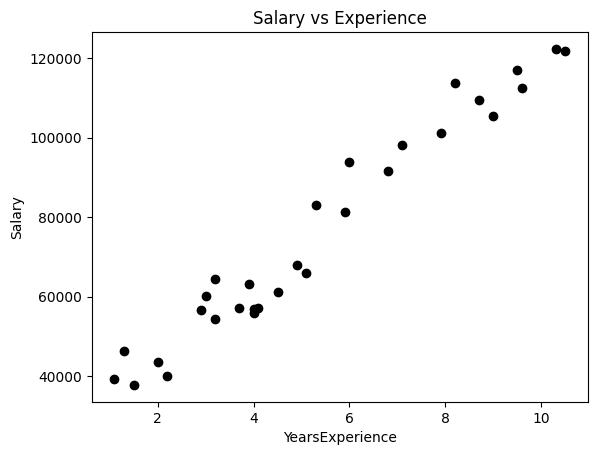

In [223]:
plt.scatter(x,y,color='k')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')

In [224]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,YearsExperience
0,1.1
4,2.2
16,5.1
5,2.9
13,4.1
11,4.0
22,7.9
1,1.3
2,1.5
25,9.0


In [225]:
x_test

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2
9,3.7
28,10.3
24,8.7
12,4.0


In [226]:
y_train

0      39343.0
4      39891.0
16     66029.0
5      56642.0
13     57081.0
11     55794.0
22    101302.0
1      46205.0
2      37731.0
25    105582.0
3      43525.0
21     98273.0
26    116969.0
18     81363.0
29    121872.0
20     91738.0
7      54445.0
10     63218.0
14     61111.0
19     93940.0
6      60150.0
Name: Salary, dtype: float64

In [227]:
y_test

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
9      57189.0
28    122391.0
24    109431.0
12     56957.0
Name: Salary, dtype: float64

In [228]:
#no scaling because values are small

In [229]:
#Model Creation
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([115573.62288352,  71679.93878159, 102498.90847018,  75415.57147111,
        55803.4998511 ,  60473.04071301, 122110.98009019, 107168.44933209,
        63274.76523015])

In [230]:
print(model.predict([[3.2]]))

[55803.4998511]


c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


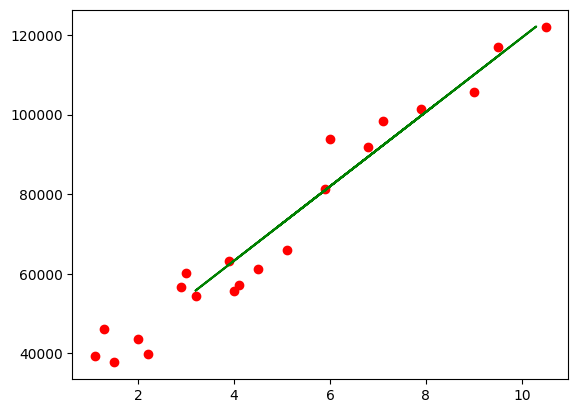

In [231]:
plt.scatter(x_train,y_train,color='r')
plt.plot(x_test,y_pred,color='g')

In [232]:
#y=mx+c

print("slope = ",model.coef_)

slope =  [9339.08172382]


In [233]:
print('constant = ',model.intercept_)

constant =  25918.438334893202


In [234]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

MAE= mean_absolute_error(y_test,y_pred)
MAE

5161.328710400183

In [235]:
MAPE=mean_absolute_percentage_error(y_test,y_pred)
MAPE

0.06647907533756252

In [236]:
MSE=mean_squared_error(y_test,y_pred)
MSE

37784662.46621314

In [240]:
# from sklearn.metrics import root_mean_squared_error
# RMSE=root_mean_squared_error(y_test,y_pred)
# RMSE

RMSE=MSE**0.5
RMSE

6146.92300799458

In [238]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.9414466227178214